<a href="https://colab.research.google.com/github/shailavij/NLP/blob/master/OCR_Translate__Tamil_to_English%2C_French.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
# Package to extract text from images ( OCR)

     |████████████████████████████████| 48.4MB 89kB/s 


##python project that can take pictures of any language, convert to English and then play audio of the text. Not only that one can play the audio in any Accent (Indian, Chinese, Russian, Japanese, American etc). In case if someone is not able to understand English, no worries it can translate and play audio in target language be it French or German

In [ ]:
!pip install googletrans

# google translate API

     |████████████████████████████████| 61kB 2.7MB/s 
     |████████████████████████████████| 952kB 7.9MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=9b9bc545a660b7da86f920b1ee93affc13e105df98602bcb9d5506d1db2141fd
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=b6111c599e6dfe1a8217c01adb411866a5bcdbef4f3ca42d1f3438ab3d1c7299
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
!pip install gTTS
# Googletext to speech package

  Created wheel for gtts-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4096 sha256=aa81a77108c55d017832aab28ffde1d2978294764988a72f9820df1c40979b0a
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gtts-token


In [ ]:
!wget https://i.stack.imgur.com/mk1jX.jpg

--2020-08-26 17:28:43--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.1.35, 104.16.27.34, 104.16.28.34, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.1.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg’

mk1jX.jpg           100%[===================>]  44.12K  --.-KB/s    in 0.003s  

2020-08-26 17:28:44 (13.9 MB/s) - ‘mk1jX.jpg’ saved [45178/45178]



In [ ]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [ ]:
reader = easyocr.Reader(['ta'])
translator=Translator()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


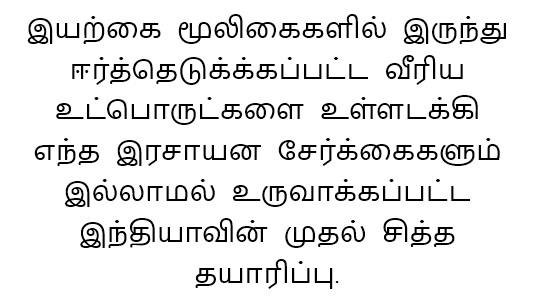

In [ ]:
import PIL
from PIL import ImageDraw
im=PIL.Image.open("mk1jX.jpg")
im

In [ ]:
bounds= reader.readtext("mk1jX.jpg", add_margin=0.55,width_ths=0.7,link_threshold=0.8,decoder='beamsearch',blocklist='=-')
bounds

[([[32, 0], [532, 0], [532, 70], [32, 70]],
  'இயற்கை மூலிகைகளில் இருந்து',
  0.1882294863462448),
 ([[49, 29], [489, 29], [489, 110], [49, 110]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.0326014868915081),
 ([[38, 77], [324, 77], [324, 146], [38, 146]],
  'உட்பொருட்களை ',
  0.18306025862693787),
 ([[304, 78], [496, 78], [496, 140], [304, 140]],
  'உள்ளடக்கி',
  0.4530618488788605),
 ([[14, 118], [523, 118], [523, 188], [14, 188]],
  'எந்த இரசாயன சேர்க்கைகளும்',
  0.05448511987924576),
 ([[71, 156], [491, 156], [491, 229], [71, 229]],
  'இல்லாமல் உருவாக்கப்பட்ட',
  0.6472392678260803),
 ([[60, 195], [478, 195], [478, 272], [60, 272]],
  'இந்தியாவின் முதல் சித்த',
  0.42970988154411316),
 ([[174, 237], [359, 237], [359, 303], [174, 303]],
  'தயாரிப்பு',
  0.15375211834907532)]

In [ ]:
def draw_boxes(image, bounds, color='yellow',width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3= bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0],fill=color,width=width)
  return image

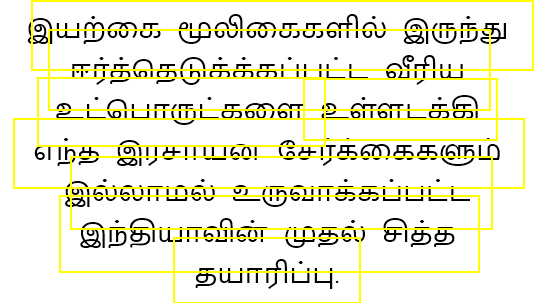

In [ ]:
draw_boxes(im, bounds)

In [ ]:
# REmoving bounding box 
text_list=reader.readtext("mk1jX.jpg", add_margin=0.55,width_ths=0.7,link_threshold=0.8,decoder='beamsearch',blocklist='=-',detail=0)
text_list

['இயற்கை மூலிகைகளில் இருந்து',
 'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
 'உட்பொருட்களை ',
 'உள்ளடக்கி',
 'எந்த இரசாயன சேர்க்கைகளும்',
 'இல்லாமல் உருவாக்கப்பட்ட',
 'இந்தியாவின் முதல் சித்த',
 'தயாரிப்பு']

In [ ]:
text_comb= ' '.join(text_list)
text_comb

'இயற்கை மூலிகைகளில் இருந்து ஈர்த்தெடுக்க்கப்பட்ட வீரிய உட்பொருட்களை  உள்ளடக்கி எந்த இரசாயன சேர்க்கைகளும் இல்லாமல் உருவாக்கப்பட்ட இந்தியாவின் முதல் சித்த தயாரிப்பு'

In [ ]:
print(translator.detect(text_comb))

Detected(lang=ta, confidence=1.0)


In [ ]:
text_en= translator.translate(text_comb,src='ta')
print(text_en.text)

India's first paranormal product made without any chemical additives containing active ingredients extracted from natural herbs


In [ ]:
ta_tts= gTTS(text_en.text)
ta_tts.save('trans.mp3')

In [ ]:
Audio('trans.mp3',autoplay=True)

In [ ]:
ta_tts= gTTS(text_en.text,lang= 'ja')   # Japan Language
ta_tts.save('trans.mp3')

In [ ]:
Audio('trans.mp3',autoplay=True)

In [ ]:
# Tamil to Hindi text
text_hi = translator.translate(text_comb,src='ta',dest='hi')
print(text_hi.text)

प्राकृतिक जड़ी बूटियों से निकाले गए सक्रिय तत्वों से युक्त किसी भी रासायनिक योजक के बिना भारत का पहला असाधारण उत्पाद


In [ ]:
ta_tts= gTTS(text_hi.text,lang= 'hi')   # Japan Language
ta_tts.save('trans_hi.mp3')

In [ ]:
Audio('trans_hi.mp3',autoplay=True)

In [ ]:
# Tamil to frenbch text
text_fr = translator.translate(text_comb,src='ta',dest='fr')
print(text_fr.text)

Le premier produit paranormal de l'Inde fabriqué sans aucun additif chimique contenant des ingrédients actifs extraits d'herbes naturelles


In [ ]:
ta_tts_fr= gTTS(text_fr.text,lang= 'hi')   # Japan Language
ta_tts_fr.save('trans_fr.mp3')

In [ ]:
Audio('trans_fr.mp3',autoplay=True)